# Import Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.metrics import silhouette_score,accuracy_score, classification_report,r2_score,mean_squared_error
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import joblib
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
digits=load_digits()

In [3]:
x=digits.data
y=digits.target

# Data Exploration

In [4]:
x.shape

(1797, 64)

In [5]:
y.shape

(1797,)

In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [8]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

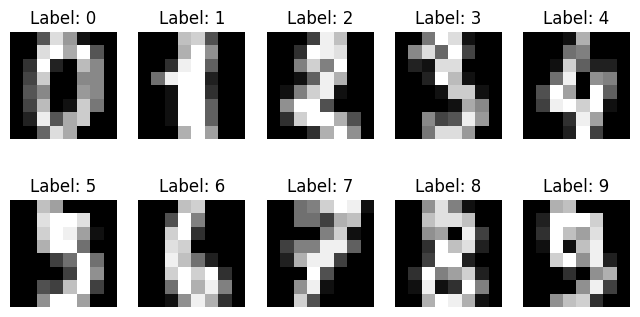

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(8, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.show()

In [11]:
df=pd.DataFrame(x)
df['target']=y

In [12]:
df.isna().sum().sum()

np.int64(0)

In [13]:
df.duplicated().sum()

np.int64(0)

# Preprocessing

In [14]:
#scale the data
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [15]:
#splitting the data
x_train ,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

# Apply LogisticRegression

In [16]:

#apply the model
log_reg=LogisticRegression(max_iter=5000)

log_reg.fit(x_train,y_train)

#prediction
y_pred=log_reg.predict(x_test)

In [17]:
log_r2=r2_score(y_test,y_pred)
print(f'R2 Score {log_r2}')

R2 Score 0.9460599274206357


In [18]:
#accuracy
log_acc=accuracy_score(y_test,y_pred)
print(f"Accuracy= {log_acc}")

Accuracy= 0.9666666666666667


In [19]:
log_mse=mean_squared_error(y_test,y_pred)
print(f'MSE = {log_mse}')

MSE = 0.4166666666666667


In [20]:
# classification report
report=classification_report(y_test,y_pred)
print(f"Logistic Regression Report \n",report)

Logistic Regression Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.96      0.96      0.96        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      0.98      0.99        46
           5       0.91      0.91      0.91        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.90      0.95      0.93        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



# Apply KNN

In [21]:
knn=KNeighborsClassifier(n_neighbors=6)

knn.fit(x_train,y_train)

#prediction
y_predd = knn.predict(x_test)



In [22]:
knn_r2=r2_score(y_test,y_predd)
print(f'R2 Score {knn_r2}')

R2 Score 0.9834583777423282


In [23]:
#accuracy
knn_acc=accuracy_score(y_test,y_predd)
print(f"Accuracy= {knn_acc}")

Accuracy= 0.9888888888888889


In [24]:
knn_mse=mean_squared_error(y_test,y_predd)
print(f'MSE = {knn_mse}')

MSE = 0.12777777777777777


In [25]:
# classification report
report=classification_report(y_test,y_predd)
print(f"KNN Report \n",report)

KNN Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.97      0.95      0.96        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



# Apply RandomForest

In [26]:
# apply the model with SCALED DATA
r_forest=RandomForestClassifier(n_estimators=100,random_state=42)

r_forest.fit(x_train,y_train)

#prediction
ypred=r_forest.predict(x_test)


In [27]:
rf_r2=r2_score(y_test,ypred)
print(f'R2 Score {rf_r2}')

R2 Score 0.9510943341947097


In [28]:
rforest_acc=accuracy_score(y_test,ypred)
print(f"Accuracy={rforest_acc}")

Accuracy=0.9722222222222222


In [29]:
rf_mse=mean_squared_error(y_test,ypred)
print(f'MSE = {rf_mse}')

MSE = 0.37777777777777777


In [30]:
rforest_report=classification_report(y_test,ypred)
print(f"Random Forest Report \n {rforest_report}")

Random Forest Report 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



# Apply MLP


In [31]:
#build mlp
mlp=MLPClassifier(hidden_layer_sizes=100,activation='relu',solver='adam',max_iter=500,random_state=42)

mlp.fit(x_train,y_train)

#prediction
ypredd=mlp.predict(x_test)


In [32]:
mlp_r2=r2_score(y_test,ypredd)
print(f'R2 Score {mlp_r2}')

R2 Score 0.9751875666134924


In [33]:
mlp_acc=accuracy_score(y_test,ypredd)
print(f"MLP Accuracy= {mlp_acc}")

MLP Accuracy= 0.9805555555555555


In [34]:
mlp_mse=mean_squared_error(y_test,ypredd)
print(f'MSE = {mlp_mse}')

MSE = 0.19166666666666668


In [35]:
#classification report
mlp_report=classification_report(y_test,ypredd)
print(f"MLP report \n {mlp_report}")

MLP report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.93      0.95        30
           9       0.97      0.97      0.97        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



# Apply CNN

In [36]:
# form the data
X=digits.images
Y=digits.target

In [ ]:
# normalize and reshape X
X=X.reshape(-1,8,8,1).astype('float32')/16.0

In [43]:
#convert y by one-hot
Y_encoded=to_categorical(Y,num_classes=10)

In [45]:
#splitting the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_encoded,test_size=0.2,random_state=42)

In [64]:
cnn=models.Sequential([
      layers.Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(8,8,1)),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),
      layers.Dropout(0.4),

      layers.Conv2D(128,(3,3),activation='relu',padding='same'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),

      layers.Flatten(),
      layers.Dense(128,activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10,activation='softmax')

])

cnn.compile(optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',metrics=['accuracy'])

cnn.fit(X_train ,Y_train ,epochs=8 ,batch_size=32 ,validation_split=0.1, verbose=1)

acc_cnn=cnn.evaluate(X_test,Y_test,verbose=0)[1]
print(f'CNN Accuracy = {acc_cnn:.4f}')

Epoch 1/8
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3224 - loss: 2.5526 - val_accuracy: 0.7500 - val_loss: 1.0814
Epoch 2/8
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7697 - loss: 0.6411 - val_accuracy: 0.9514 - val_loss: 0.4226
Epoch 3/8
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8808 - loss: 0.3839 - val_accuracy: 0.9375 - val_loss: 0.2680
Epoch 4/8
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8959 - loss: 0.2771 - val_accuracy: 0.9792 - val_loss: 0.1129
Epoch 5/8
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9274 - loss: 0.2464 - val_accuracy: 0.9653 - val_loss: 0.1112
Epoch 6/8
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9345 - loss: 0.1906 - val_accuracy: 0.9722 - val_loss: 0.0777
Epoch 7/8
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9595 - loss: 0.1378 - val_accuracy: 0.9931 - val_loss: 0.0434
Epoch 8/8
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9620 - loss: 0.1201 - val_accuracy: 0.9931 - val_loss:

In [69]:
cnn_pred=cnn.predict(X_test)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [71]:
cnn_r2=r2_score(Y_test,cnn_pred)
print(f"R² Score = {cnn_r2:.4f}")

R² Score = 0.9731


In [72]:
cnn_mse=mean_squared_error(Y_test,cnn_pred)
print(f"MSE = {cnn_mse:.4f}")


MSE = 0.0023


In [52]:
cnn.save('modell.h5')

# Visualization

In [65]:
DATA={'Models':['LogisticReg','KNN','RandomForest','MLP','CNN'],
          'Accuracy':[log_acc , knn_acc , rforest_acc , mlp_acc ,acc_cnn]}
df=pd.DataFrame(DATA)

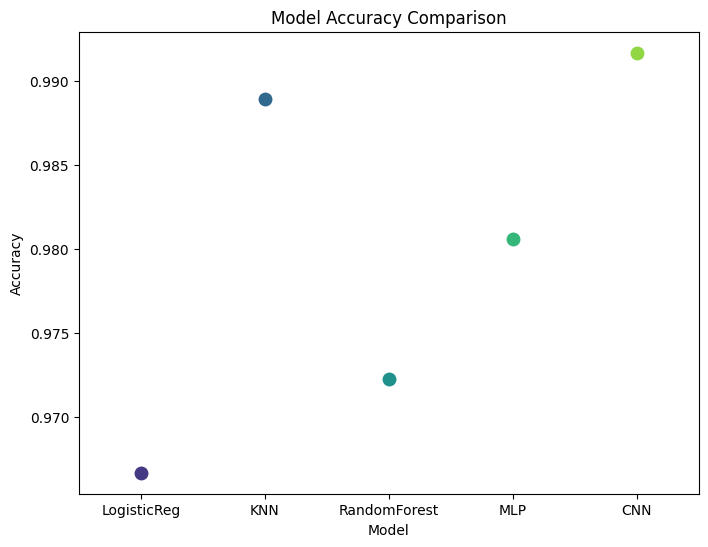

In [66]:
plt.figure(figsize=(8,6))
sns.stripplot(df,x='Models',y='Accuracy',palette='viridis', size=10)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Model Accuracy Comparison')
plt.show()

In [73]:
DATAA={'models':['LogisticReg','KNN','RandomForest','MLP','CNN'],
    'Accuracy':[log_acc , knn_acc , rforest_acc , mlp_acc ,acc_cnn],
     'R2 Score':[log_r2 , knn_r2 , rf_r2 , mlp_r2 ,cnn_r2],
     'MSE':[log_mse ,knn_mse ,rf_mse ,mlp_mse ,cnn_mse]}

In [74]:
dff=pd.DataFrame(DATAA)

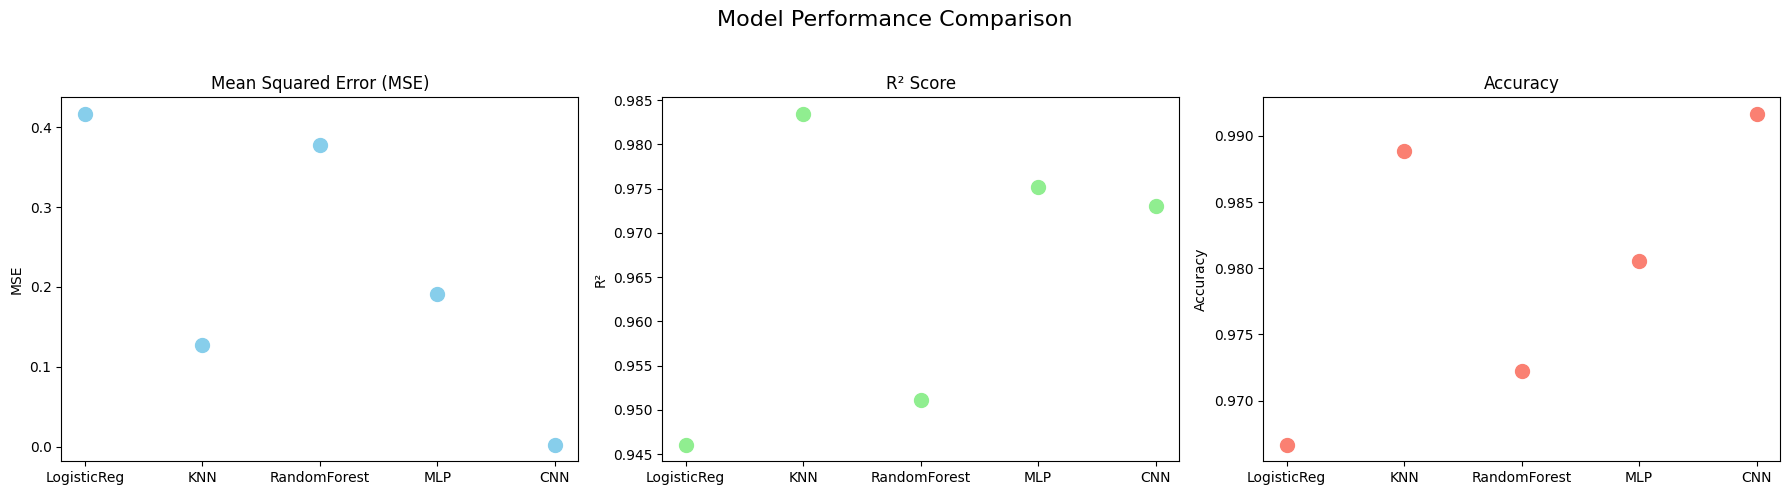

In [75]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Model Performance Comparison', fontsize=16)

axs[0].scatter(dff['models'],dff['MSE'], color='skyblue',s=100)
axs[0].set_title('Mean Squared Error (MSE)')
axs[0].set_ylabel('MSE')

axs[1].scatter(dff['models'],dff['R2 Score'], color='lightgreen',s=100)
axs[1].set_title('R² Score')
axs[1].set_ylabel('R²')

axs[2].scatter(dff['models'],dff['Accuracy'],color='salmon',s=100)
axs[2].set_title('Accuracy')
axs[2].set_ylabel('Accuracy')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()